In [1]:
'''
iDtech AI & ML Final Project
Code by: Joey O'Neill
Edited by: Richie Rich
06/09/2022
'''

"\niDtech AI & ML Final Project\nCode by: Joey O'Neill\nEdited by: Richie Rich\n06/09/2022\n"

In [2]:
# Needed Imports
import glob
#from google.colab import drive

import matplotlib.pyplot as plt
from matplotlib import image
import matplotlib.image as img
from matplotlib import pyplot

import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K

%matplotlib inline

In [3]:
from PIL import Image

In [4]:
# MAY OR MAY NOT NEED TO MOUNT DRIVE
# WE WILL SEE TOMORROW :P

# Loading in putin file names
putin_files = glob.glob("C:\\Users\\Student\\Desktop\\Rihard_Z\\final-proj\\putin\\*.jpg")
print("Number of files: {}".format(len(putin_files)))

# Loading in zelensky file name
zelensky_files = glob.glob("C:\\Users\\Student\\Desktop\\Rihard_Z\\final-proj\\zelensky\\*.jpg")
print("Number of files: {}".format(len(zelensky_files)))

Number of files: 55
Number of files: 60


In [5]:
# concat the files
dataset = putin_files + zelensky_files

# create labels for the files
data_labels = []

# append to labels
# putin = russian tanks = 0
for i in range(len(putin_files)):
  data_labels.append(0)

# zelensky = us tanks = 1
for i in range(len(zelensky_files)):
  data_labels.append(1)

# print labels to confirm
print(data_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [6]:
# Train test splitting the data
X_train, X_test, y_train, y_test = train_test_split(dataset, data_labels, test_size=0.2, random_state=42)

# Print to confirm not empty
print("X_train: " + str(X_train))
print("X_train length: " + str(len(X_train)))
print("y_train: " + str(y_train) + '\n')

# Print to confirm not empty
print("X_test: " + str(X_test))
print("X_test length: " + str(len(X_test)))
print("y_test: " + str(y_test))

X_train: ['C:\\Users\\Student\\Desktop\\Rihard_Z\\final-proj\\putin\\Russian-tank-696x392.jpg', 'C:\\Users\\Student\\Desktop\\Rihard_Z\\final-proj\\zelensky\\3fa931429fc792b17b2e25e16c12f877.jpg', 'C:\\Users\\Student\\Desktop\\Rihard_Z\\final-proj\\zelensky\\m1a2-abrams-battle-tank-02.jpg', 'C:\\Users\\Student\\Desktop\\Rihard_Z\\final-proj\\zelensky\\tumblr_opemklVXt01tj31v2o1_1280.jpg', 'C:\\Users\\Student\\Desktop\\Rihard_Z\\final-proj\\putin\\images.jpg', 'C:\\Users\\Student\\Desktop\\Rihard_Z\\final-proj\\putin\\tank.jpg', 'C:\\Users\\Student\\Desktop\\Rihard_Z\\final-proj\\zelensky\\t84.jpg', 'C:\\Users\\Student\\Desktop\\Rihard_Z\\final-proj\\zelensky\\battle-of-medina-ridge.jpg', 'C:\\Users\\Student\\Desktop\\Rihard_Z\\final-proj\\putin\\download.jpg', 'C:\\Users\\Student\\Desktop\\Rihard_Z\\final-proj\\putin\\russian-t-14-armata-tank.jpg', 'C:\\Users\\Student\\Desktop\\Rihard_Z\\final-proj\\zelensky\\e6c6ae38a43ebed58af8f790c730d916.jpg', 'C:\\Users\\Student\\Desktop\\Rihard_Z

In [7]:
# Initialize train & test datasets
train_data = []
test_data = []

# Appends picture matrix representations for train data
for file in X_train:
    pic = Image.open(file)
    pic = pic.convert('RGB')
    pic = np.asarray(pic)
    train_data.append(pic)

# Appends picture matrix representations for test data
for file in X_test:
    pic = Image.open(file)
    pic = pic.convert('RGB')
    pic = np.asarray(pic)
    test_data.append(pic)

print("train_data length: " + str(len(train_data)))
print("train_data[0].shape: " + str(train_data[0].shape))
print(str(y_train)+"\n")

print("test_data length: " + str(len(test_data)))
print(y_test)

train_data length: 92
train_data[0].shape: (500, 500, 3)
[0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1]

test_data length: 23
[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]


In [8]:
# Cast datasets as np arrays
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)

# Cast label arrays as np arrays
train_labels = np.asarray(y_train)
test_labels = np.asarray(y_test)

# Print to confirm conversion
print("train_data: " + str(train_data.shape) + " " + str(type(train_data)))
print("test_data: " + str(test_data.shape) + " " + str(type(test_data)))
print("train_labels: " + str(train_labels.shape) + " " + str(type(train_labels)))
print("test_lables: " + str(test_labels.shape) + " " + str(type(test_labels)))

train_data: (92, 500, 500, 3) <class 'numpy.ndarray'>
test_data: (23, 500, 500, 3) <class 'numpy.ndarray'>
train_labels: (92,) <class 'numpy.ndarray'>
test_lables: (23,) <class 'numpy.ndarray'>


In [9]:
# FOR TESTING PURPOSES ONLY
i = 0
for item in test_data:
    print(str(i) + ": " + str(item.shape))
    i += 1

0: (500, 500, 3)
1: (500, 500, 3)
2: (500, 500, 3)
3: (500, 500, 3)
4: (500, 500, 3)
5: (500, 500, 3)
6: (500, 500, 3)
7: (500, 500, 3)
8: (500, 500, 3)
9: (500, 500, 3)
10: (500, 500, 3)
11: (500, 500, 3)
12: (500, 500, 3)
13: (500, 500, 3)
14: (500, 500, 3)
15: (500, 500, 3)
16: (500, 500, 3)
17: (500, 500, 3)
18: (500, 500, 3)
19: (500, 500, 3)
20: (500, 500, 3)
21: (500, 500, 3)
22: (500, 500, 3)


In [10]:
# FOR TESTING PURPOSES ONLY
X_test[8]

'C:\\Users\\Student\\Desktop\\Rihard_Z\\final-proj\\putin\\tanks.jpg'

In [11]:
# Reformat the data to float32
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [12]:
# Normalize the values by dividing by 255
train_data /= 255
test_data /= 255

In [13]:
# CONVERT LABELS TO ONE HOT ENCODED
num_classes = 2
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

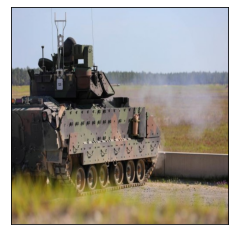

In [14]:
# Plot Image Function From iDtech gameplan
def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

# First image of test set plotted
plot_image(test_data, 0, test_labels)

In [15]:
# Initialization of variables needed for model creation and testing
epochs = 10
batch_size = 20
img_rows = 500
img_cols = 500

input_shape = (img_rows, img_cols, 3, 1)

In [16]:
# SIMPLE 1-LAYER 2D-CNN

# Model Initialization
model = Sequential() 

# Model Layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))

# Output layer
model.add(Dense(units=2,activation='softmax'))

# Prints a summary table of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 500, 498, 1, 64)   640       
                                                                 
 flatten (Flatten)           (None, 15936000)          0         
                                                                 
 dense (Dense)               (None, 64)                1019904064
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 1,019,913,154
Trainable params: 1,019,913,

In [17]:
# Model Compilation
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
# Model Training (Fitting)
model.fit(train_data, train_labels,
           batch_size=batch_size,
           epochs=epochs,
           validation_data=(test_data, test_labels),
           shuffle=True)

Epoch 1/10
4/5 [=======================>......] - ETA: 2:25 - loss: 143.7366 - accuracy: 0.5500

In [ ]:
# Model Evaluation
scores = model.evaluate(test_data, test_labels,verbose=0) 
print('Test accuracy:', scores[1])